# Introduction

We need to first import the necessary packages and files:

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from numpy import exp
from sklearn.preprocessing import StandardScaler

In [2]:
heart_disease_training= pd.read_csv(r'C:\Users\Calvi\Documents\Data Science Toolbox\Assessment 1\Heart Disease Data\imputed_train_90_10.csv')
heart_disease_test = pd.read_csv(r'C:\Users\Calvi\Documents\Data Science Toolbox\Assessment 1\Heart Disease Data\imputed_test_90_10.csv')

We then separate the features and target variables:

In [3]:
y_train = np.array(heart_disease_training.iloc[:, 0]).astype(int)[np.newaxis,:].T
y_test = np.array(heart_disease_test.iloc[:, 0]).astype(int)[np.newaxis,:].T
del heart_disease_training['HeartDiseaseorAttack']
del heart_disease_test['HeartDiseaseorAttack']

In [4]:
x_train = heart_disease_training.to_numpy()
x_test = heart_disease_test.to_numpy()

In [5]:
def center_function(data):
    mean = data.mean(axis=1)
    std = data.std(axis=1)
    for i in range(data.shape[1]):
        data[i] -= mean[i]
        data[i] /= std[i]
    return data,mean,std

In [6]:
cf = center_function(x_train)
x_train_centered = cf[0]

In [7]:
print("Standardised Training Data:")
print(pd.DataFrame(x_train_centered).head())

Standardised Training Data:
         0         1         2         3         4         5         6   \
0 -0.651402 -0.432579 -1.016107 -0.264223 -0.140816 -1.016107 -0.432579   
1 -1.000264 -0.527308 -1.338089 -0.617828 -0.527308 -1.000264 -0.257048   
2 -0.475150 -0.175281 -0.974933  0.241825 -0.175281 -0.475150 -0.175281   
3 -0.503916 -0.264668 -0.902664 -0.052513 -0.264668 -0.503916  0.373328   
4 -0.973606 -0.323072  2.279063  0.024712 -0.323072 -0.567023  0.327461   

         7         8         9   ...        11        12        13        14  \
0 -0.651402 -0.651402 -1.016107  ... -1.016107 -0.432579  0.734476  1.574041   
1  1.364513  1.364513  1.364513  ... -1.338089 -0.527308 -0.257048  1.061160   
2 -0.475150 -0.974933 -0.974933  ... -0.974933  0.224545  1.424023  0.208226   
3 -0.503916 -0.902664 -0.902664  ... -0.902664  1.649320  0.373328  1.929257   
4 -0.567023 -0.567023 -0.567023  ... -0.973606  0.002195  0.327461  1.913968   

         15        16        17        1

# PCA

In [8]:
percentage = 99 # This is the amount of explained variance we desire

The function below retrives and orders the eigenvectors and values of the covariance matrix of the data:

In [9]:
def cov_eigen(data):
    hd_scaled = StandardScaler().fit_transform(data)
    features = hd_scaled.T
    cov_matrix = np.cov(features)
    values, vectors = np.linalg.eig(cov_matrix)
    idx = values.argsort()[::-1]
    vectors = vectors.T[:,idx]
    return values,vectors

The pcafeatures function calculates the amount of components to have a certain amount of explained variance and outputs that,the explained variances and a list of the principle component names

In [10]:
def pcafeatures(data,percentage):
    hd_scaled = StandardScaler().fit_transform(data)
    features = hd_scaled.T
    cov_matrix = np.cov(features)
    values, vectors = np.linalg.eig(cov_matrix)
    explained_variances = []
    a = 0
    num = 0
    for i in range(len(values)):
        explained_variances.append(values[i] / np.sum(values))
    for i in range(len(explained_variances)):
        while a < percentage:
            a += explained_variances[i]*100
            num += 1
    pc_feat = ['PC{}'.format(i+1) for i in range(num)]
    return pc_feat,num,explained_variances

In [11]:
print("Checking explained variance:")
print(str(pcafeatures(x_train_centered,percentage)[2]))
a = np.sum(pcafeatures(x_train_centered,percentage)[2])
print("Sum of explained variance is",a)

Checking explained variance:
[0.16122278582291324, 0.09510976592156575, 0.08456620021837538, 0.0631080886938527, 0.010723483763500222, 0.013672319292575816, 0.058487376083265666, 0.052650017348242664, 0.023511413396570636, 0.02442033367876146, 0.025066557121238016, 0.027023407068114933, 0.028790295133363734, 0.04878497348939676, 0.0465852122081128, 0.03498757617545907, 0.0360589025049132, 0.043672669967562514, 0.042011987503775265, 0.03935953642493362, 0.04018709818350655]
Sum of explained variance is 0.9999999999999998


In [12]:
num_of_comps = pcafeatures(x_train_centered,percentage)[1]
cov_evecs = cov_eigen(x_train_centered)[1][:,:num_of_comps]

In [13]:
print("Covariance Eigenvectors:")
print(pd.DataFrame(cov_evecs).head())

Covariance Eigenvectors:
          0         1         2         3         4         5         6
0 -0.033591  0.033439 -0.057418  0.156377  0.020322 -0.465769 -0.080302
1 -0.381940 -0.167564  0.229326 -0.211940  0.362439  0.060261 -0.465829
2  0.071377  0.480687 -0.427200 -0.109507  0.027244  0.034382 -0.260186
3 -0.281266  0.297176 -0.331177  0.026670  0.165648  0.024536 -0.069326
4  0.004051  0.020925  0.046103 -0.009962  0.006449  0.754926  0.005408


In [14]:
x_train_pca = np.dot(x_train_centered,cov_evecs)

In [15]:
print(pd.DataFrame(x_train_pca[:5,:], columns = pcafeatures(x_train_centered,percentage)[0]))

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -0.378901  0.287580  0.675054 -0.965061  0.188464  0.011829 -0.063014
1  0.493631  0.640975  0.619701 -0.674361 -0.183889  0.775866 -0.136453
2 -0.966937  0.084204  1.075097 -0.126546 -0.927389 -0.208541 -0.152739
3 -1.238593  0.121333  0.834861 -1.199362 -0.640495  0.015828  0.350526
4 -0.009036  1.664690 -0.598359 -1.412363 -0.562404  0.353474 -1.193509


# Logistic Regression

In [16]:
#%% Parameter initialize and sigmoid function

def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

def sigmoid(z):
    y_head = 1 / (1+exp(-z))
    return y_head

The sigmoid function is used for deciding the probability. It's clear from the graph below that the the higher the input it, the closer it tends to 1 and the lower it is, the closer it tends to 0. As we are working with binary classification, the only outcomes we desire are 1 or 0.

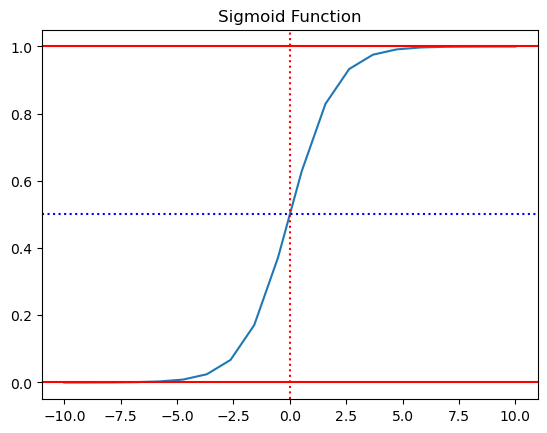

In [17]:
x_axis = np.linspace(-10,10,20)
plt.plot(x_axis,sigmoid(x_axis))
plt.axhline(y=1,color = 'r',linestyle = '-')
plt.axhline(y=0,color = 'r',linestyle = '-')
plt.axhline(y=0.5,color = 'b', linestyle = ':')
plt.axvline(x=0,color = 'r', linestyle = ':')
plt.title("Sigmoid Function")

plt.show()

In [18]:
#%% Loss function

def logloss(y_hat,y):
    a = np.log(y_hat)
    b = np.log(1-y_hat)
    loss = (-1/x_train.shape[0]) * np.sum(y*a + (1-y)*b)
    return loss

In [19]:
#%% Forward and Backward Propagation

def forward_backward_propagation(w,b,x_train,y_hat):
    
    z = np.dot(x_train,w) + b
    y_hat = sigmoid(z)
    cost = logloss(y_hat,y_train)
    
    #backward propogation
    derivative_weight = np.dot((y_hat-y_train).T,x_train)/x_train.shape[0]
    derivative_bias = np.sum(y_hat-y_train)/x_train.shape[0]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [20]:
#%% Updating (Learning) Parameters
    
def update(w, b, x_train, y_train, learning_rate,number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iteration times
    for i in range(number_of_iteration):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * (gradients["derivative_weight"].T)
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 50 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost)) #if section defined to print our cost values in every 10 iteration. We do not need to do that. It's optional.
     # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(range(len(cost_list)),cost_list)
    plt.xticks(index,rotation= "vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list 

In [21]:
#%% Prediction

def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(x_test,w)+b)
    Y_prediction = np.zeros((x_test.shape[0],1))
    # if z is bigger than 0.5, our prediction is one means has diabete (y_head=1),
    # if z is smaller than 0.5, our prediction is zero means does not have diabete (y_head=0),
    for i in range(len(z)):
        if z[i]< 0.5:
            Y_prediction[i] = 0
        else:
            Y_prediction[i] = 1

    return Y_prediction

#predict(parameters["weight"],parameters["bias"],x_test)

In [22]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialise
    dimension =  x_train.shape[1]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print train/test Errors
    
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

The probabilities funtion outputs the probabilities of each observable testing positive or negative

In [23]:
def probabilities(x_train, x_test, y_train, learning_rate,number_of_iteration):
    # initialise
    dimension =  x_train.shape[1]
    w,b = initialize_weights_and_bias(dimension)
    # updating(learning) parameters is number_of_iteration times
    for i in range(number_of_iteration):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        # lets update
        w = w - learning_rate * (gradients["derivative_weight"].T)
        b = b - learning_rate * gradients["derivative_bias"]
    probability = sigmoid(np.dot(x_test,w)+b)
    results = predict(w,b,x_test)
    return probability, results

We need to prepare our test dataset before predicting the outcome. We need to project the test data into the same space as the training. So we follow the standardising method but use the mean and standard deviation from the training data

In [24]:
for i in range(x_test.shape[1]):
    x_test[:,i] -= cf[1][i]     
    x_test[:,i] /= cf[2][i]

In [25]:
x_test_pca = np.dot(x_test,cov_evecs)

# With and without PCA Comparison

## Without PCA:

Cost after iteration 0: 0.717596
Cost after iteration 50: 0.269387
Cost after iteration 100: 0.257548
Cost after iteration 150: 0.251523
Cost after iteration 200: 0.247923


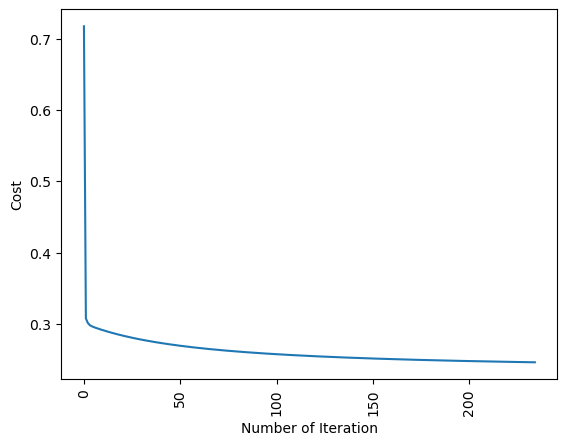

test accuracy: 86.90772782336404 %


In [26]:
start = time.time()
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 2, num_iterations = 235)
end = time.time()

In [27]:
print("Without PCA, execution time of the Logistic Regression is: " + str(end-start))

Without PCA, execution time of the Logistic Regression is: 14.894527435302734


## With PCA:

Cost after iteration 0: 0.689547
Cost after iteration 50: 0.288070
Cost after iteration 100: 0.286913
Cost after iteration 150: 0.286422
Cost after iteration 200: 0.286149


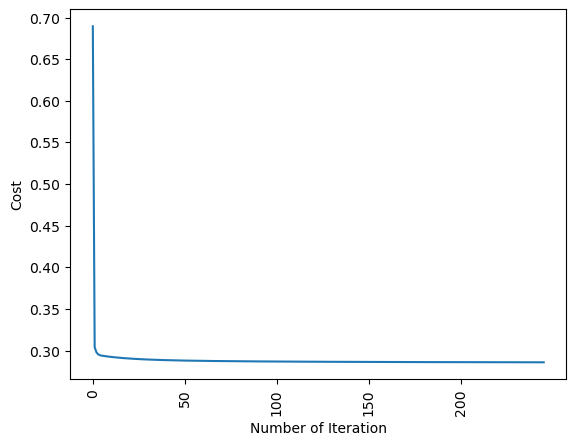

test accuracy: 88.73625745697241 %


In [28]:
start=time.time()
logistic_regression(x_train_pca, y_train, x_test_pca, y_test,learning_rate =4 , num_iterations = 246)
end=time.time()

In [29]:
print("With PCA, execution time of Logistic Regression is: " + str(end-start))

With PCA, execution time of Logistic Regression is: 15.638620138168335


We can look at the probabilities of a case being at risk of heart disease or an attack using our model:

In [30]:
y_hat = probabilities(x_train_pca, x_test_pca, y_train, learning_rate = 4,number_of_iteration = 246)[0]

In [31]:
y_hat = pd.DataFrame(y_hat, columns = ['Probabilities'])

In [32]:
print(y_hat)

       Probabilities
0           0.100849
1           0.013108
2           0.254811
3           0.026743
4           0.057471
...              ...
43746       0.003797
43747       0.017263
43748       0.000270
43749       0.022872
43750       0.006297

[43751 rows x 1 columns]
